In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

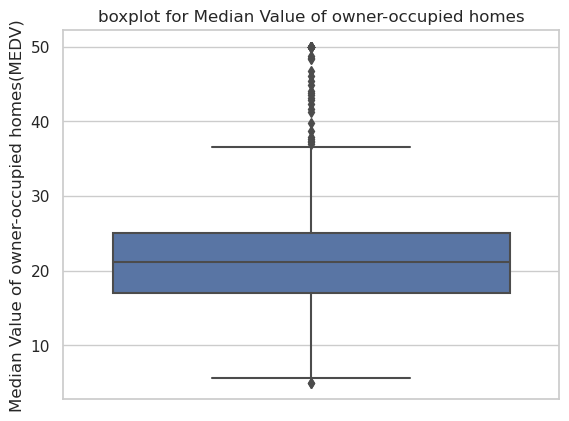

In [52]:
sns.boxplot(y = 'MEDV' , data = boston_df)
plt.title('boxplot for Median Value of owner-occupied homes')
plt.xlabel('')
plt.ylabel('Median Value of owner-occupied homes(MEDV)')
plt.show()

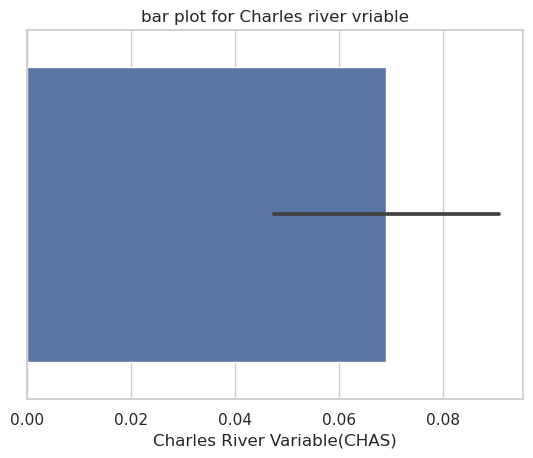

In [54]:
sns.set(style = "whitegrid")
sns.barplot(x = "CHAS" , data = boston_df)
plt.title('bar plot for Charles river vriable')
plt.xlabel('Charles River Variable(CHAS)')
plt.show()

In [28]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', 'between 35 and 70', '70 and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

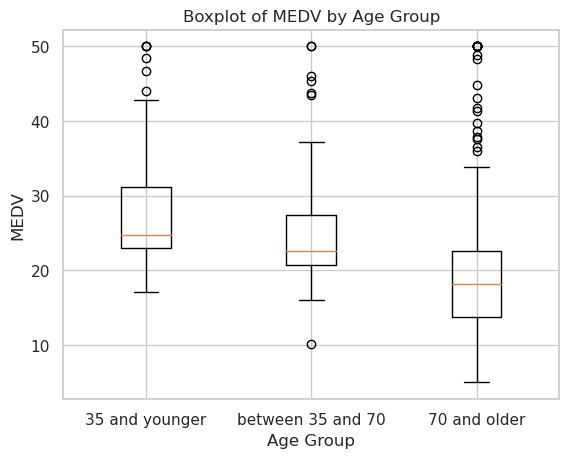

In [34]:
plt.boxplot([boston_df[boston_df['Age_Group'] == '35 and younger']['MEDV'],
             boston_df[boston_df['Age_Group'] == 'between 35 and 70']['MEDV'],
             boston_df[boston_df['Age_Group'] == '70 and older']['MEDV']],
            labels=labels )
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()

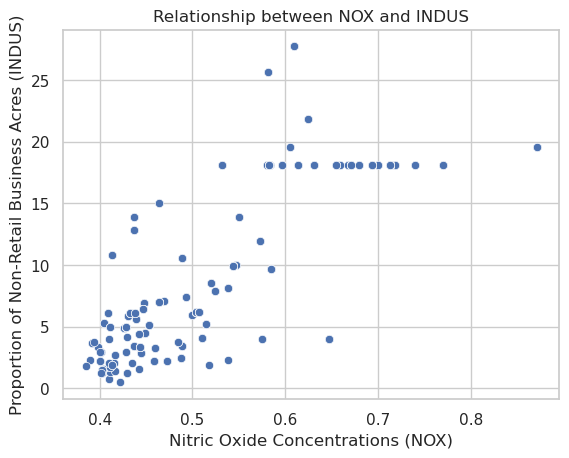

In [55]:
sns.scatterplot(x='NOX' , y='INDUS' , data = boston_df)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

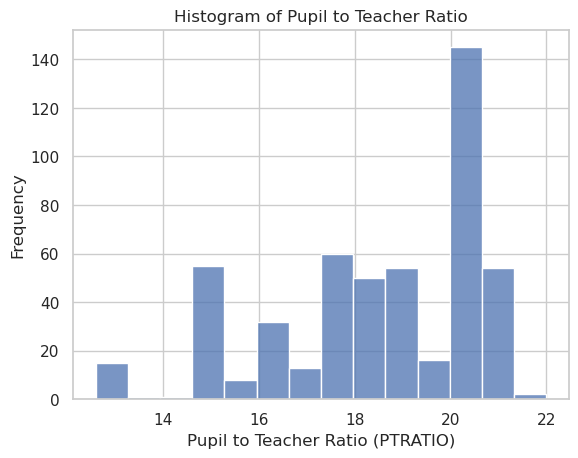

In [75]:
sns.histplot(x='PTRATIO' , data = boston_df)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

<p> α = 0.05</p>

*   $H\_0: β1$ = 0 (There is no significant difference in median value of houses bounded by the Charles river)
*   $H\_1: β1$ is not equal to 0 (There is significant difference in median value of houses bounded by the Charles river)
<p>We will use 1 if tract bounds river ; 0 otherwise</p>

In [63]:
#independent variable
X = boston_df['CHAS']
#dependent variable
y= boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           7.39e-05
Time:                        18:00:07   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a significant difference in median value of houses bounded by the Charles river. The coefficient 6.3462 means that Charles river bounds 6.3462 more than non bounded. 

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*   $H\_0: µ1 = µ2 = µ3$ (the three MEDV are equal)
*   $H\_1:$ At least one of the MEDV differ

In [68]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [72]:
X = pd.get_dummies(boston_df[['age_group']])
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.71e-15
Time:                        18:14:13   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.1292      0.321     56.399      0.000      17.498      18.761
age_group_35 years and younger        9.6466      0.715     13.496      0.000       8.242      11.051
age_group_70 years and older          1.6642      0.482      3.451      0.001       0.717       2.612
age_group_between 35 and 70 years     6.8184      0.627     10.875      0.000       5.587       8.050
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     1.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion:** We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0: µ\_1 = µ\_2$ ("there is no relationship between Nitric oxide concentrations(NOX) and proportion of non-retail business acres per town(INDUS)")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is relationship between Nitric oxide concentrations(NOX) and proportion of non-retail business acres per town(INDUS)")


In [76]:
t_stat, p_value = scipy.stats.ttest_ind(boston_df['NOX'], boston_df['INDUS'])
print(p_value)

2.75752973035888e-174


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is relationship between Nitric oxide concentrations(NOX) and proportion of non-retail business acres per town(INDUS)

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0: µ\_1 = µ\_2$ ("An additional weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes.")
*   $H\_1: µ\_1 ≠ µ\_2$ ("An additional weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.")

In [78]:
y = boston_df['MEDV']
X = boston_df[['DIS']]  # Include other independent variables if available

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        18:32:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:** Since p-value is less than 0.05 we reject the null hypothesis and conclude that an additional weighted distance to the employment centers has a statistically significant impact on the median value of owner-occupied homes.